## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master $ ```


## Problem 2: Sales Data Analysis

In [1]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

C:\Users\lhren\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0xb7127b8>,
 'caps': [<matplotlib.lines.Line2D at 0xb720518>,
 'fliers': [<matplotlib.lines.Line2D at 0xb72e5c0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xb72e048>,
 'whiskers': [<matplotlib.lines.Line2D at 0xb712978>,
  <matplotlib.lines.Line2D at 0xb77e390>]}

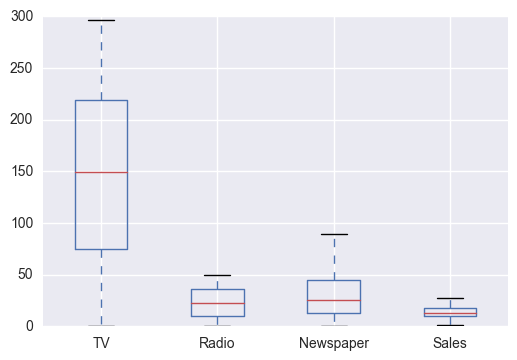

In [3]:
df.boxplot()

### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

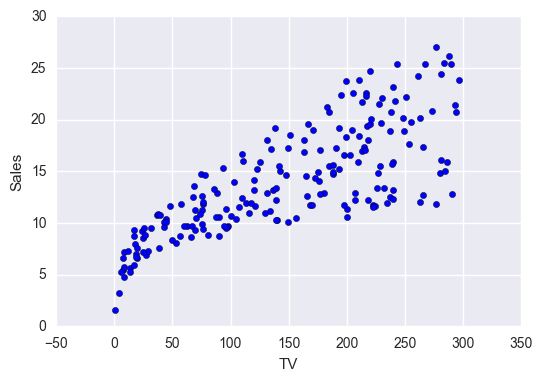

In [8]:
plt.scatter(df.TV,df.Sales)
plt.xlabel('TV')
plt.ylabel('Sales')

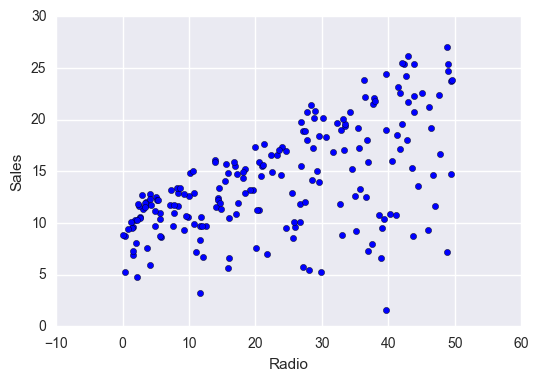

In [9]:
plt.scatter(df.Radio,df.Sales)
plt.xlabel('Radio')
plt.ylabel('Sales')

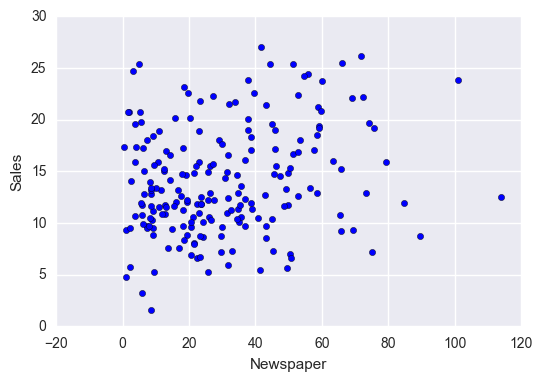

In [10]:
plt.scatter(df.Newspaper,df.Sales)
plt.xlabel('Newspaper')
plt.ylabel('Sales')

In [4]:
from pandas.tools.plotting import scatter_matrix 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BB87B38>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000D5631D0>]], dtype=object)

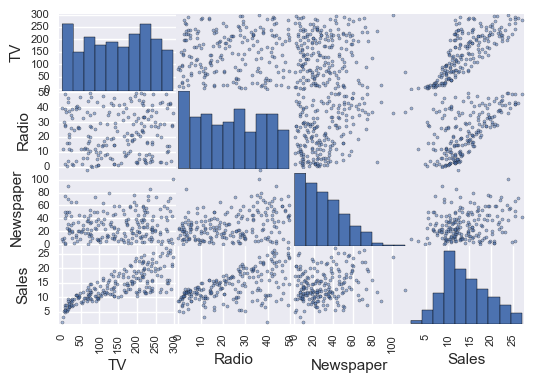

In [6]:
scatter_matrix(df)

Which of the variables seem correlated with one another? Which don't? Explain your answer

### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [11]:
from sklearn.linear_model import LinearRegression

In [36]:
import numpy as np

a) Set y to be the sales in df

In [12]:
# Code here
y = df.Sales

b) Set X to be just the features described above in df

In [21]:
# Code here
X = df.drop(labels='Sales', axis=1)

c) Randomly split data into training and testing - 80% training, 20% testing.

In [29]:
# Code here
X_train=[]
X_test=[]
y_train=[]
y_test=[]

for i in range(0,int(len(df))):
   
    if (nprnd.random()<0.8):        
        X_train.append(X.iloc[i])
        y_train.append(y.iloc[i])
    else:
        X_test.append(X.iloc[i])
        y_test.append(y.iloc[i])
    

d) Train model on training data, and make predictions on testing data

In [37]:
# Code here
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)
print('Coefficients: \n', regr.coef_)
#This is the predicted test values
y_test_pred = regr.predict(X_test)

('Coefficients: \n', array([ 0.04408604,  0.18649625, -0.00362069]))


e) Evalute the R^2 on training data. Is this good? Bad? Why?

In [38]:
# Code here
# The mean square error
 
print("Residual mean sum of squares: "+str(np.mean(regr.predict(X_train) - y_train) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_train, y_train))

Residual mean sum of squares: 9.30538261779e-31
Variance score: 0.91


The R^2 is high for the training data so the model is a close fit.

f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

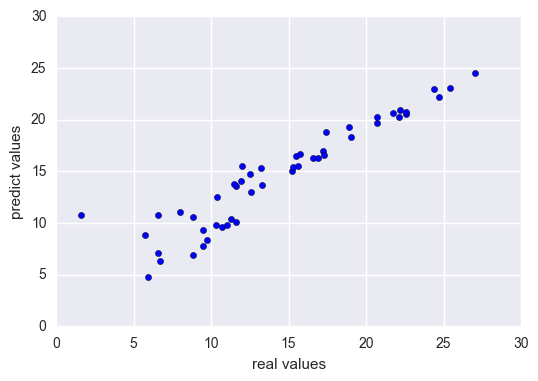

In [39]:
# Code here
plt.scatter(y_test,y_test_pred)
plt.xlabel("real values")
plt.ylabel("predict values")

The high correlation demonstrated by this plot means that the model is a good fit for the test data as well.

g) Can you measure the importance of features in this model? What is something you should check before making conclusions?

Try looking at LinearRegression().coef_

The coefficients returned by the regression model shows that Newspaper has a close to zero coefficient. If we go on to check its t-stat using its standard deviation, it may come out as insignificant in the model. On the other hand, Radio has a significant coefficient so it might be a key feature which has high explanatory power in this model.


h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

To measure the importance of each feature, we can run separate regressions on each of them and look at their R square which demonstrates its significance in 
influencing the y data. Higher R square will mean a higher importance in the data.

## How could you have improved performance?

*Hint:* Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model

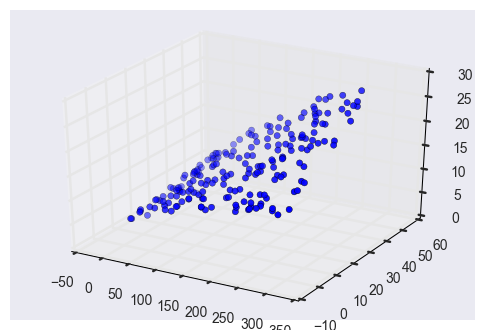

In [46]:
# Type your answer here.
from mpl_toolkits.mplot3d import *
fig = plt.figure()
ax = fig.gca(projection='3d')       
ax.scatter(df.TV,df.Radio,df.Sales)

From observing the individual behavior of TV and Radio, I think that a model which includes second power of these regressors may be a better fit to the data.

## Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 100 iterations b = 0.0350749705923, m = 1.47880271753, error = 112.647056643


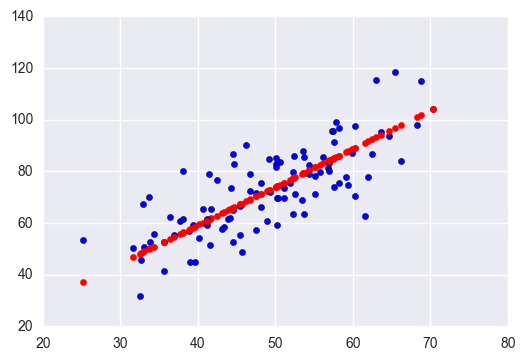

In [50]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations,l):
    points = genfromtxt("../data/data.csv", delimiter=",")
    learning_rate = l
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print "Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points))
    print "Running..."
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print "After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

run(100,0.0001)

The below cell shows how the error never converges if learning rate is too high.

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 0 iterations b = 0, m = 0, error = 5565.10783448


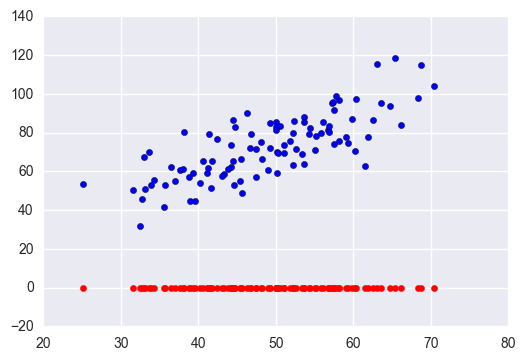

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 1 iterations b = 0.145470101107, m = 7.37070297359, error = 86648.795004


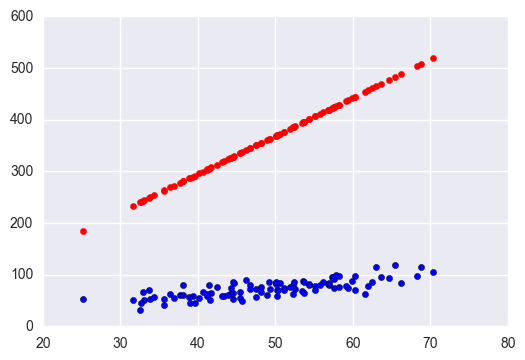

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 2 iterations b = -0.431065523973, m = -21.9931080895, error = 1373530.92887


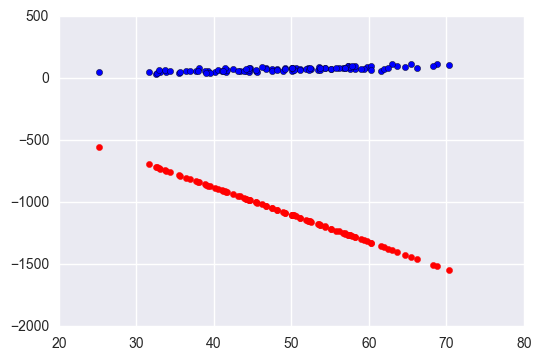

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 3 iterations b = 1.86875889947, m = 94.9877607466, error = 21797683.7739


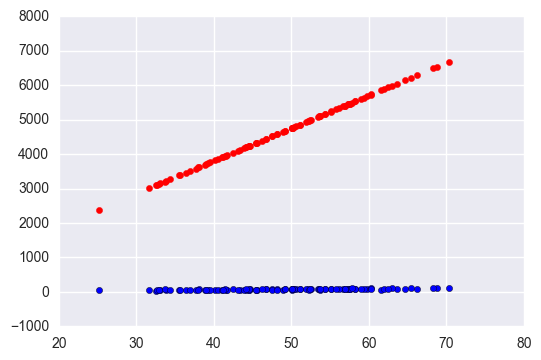

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 4 iterations b = -7.29039496782, m = -371.046169867, error = 345950151.476


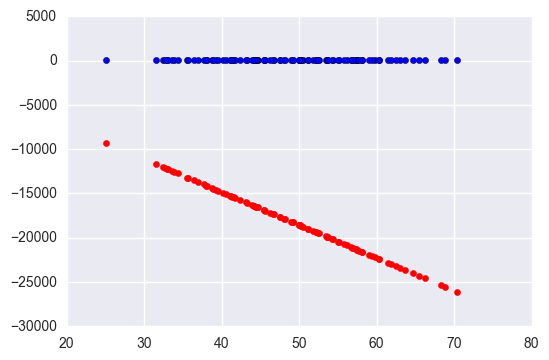

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 5 iterations b = 29.201266088, m = 1485.56160139, error = 5490585677.5


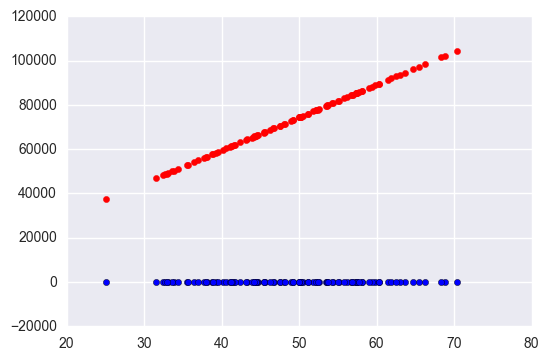

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 6 iterations b = -116.172930629, m = -5910.87957286, error = 87141281978.8


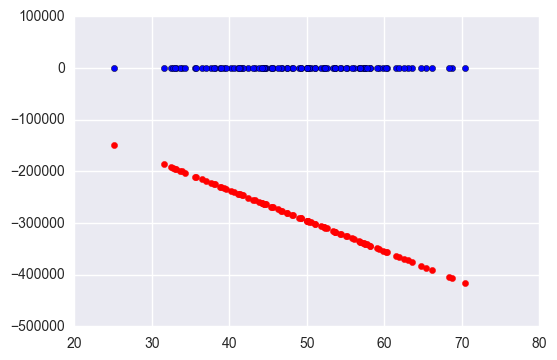

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 7 iterations b = 462.978606265, m = 23555.4096168, error = 1.38302243289e+12


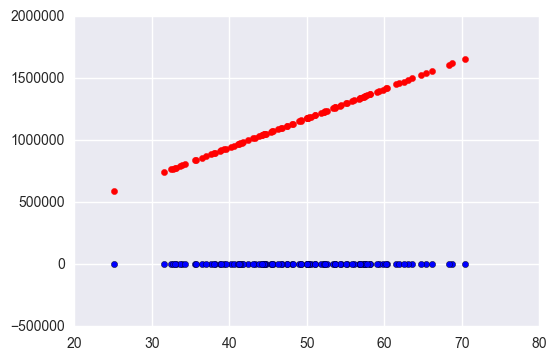

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 8 iterations b = -1844.26945541, m = -93833.7753061, error = 2.19499989972e+13


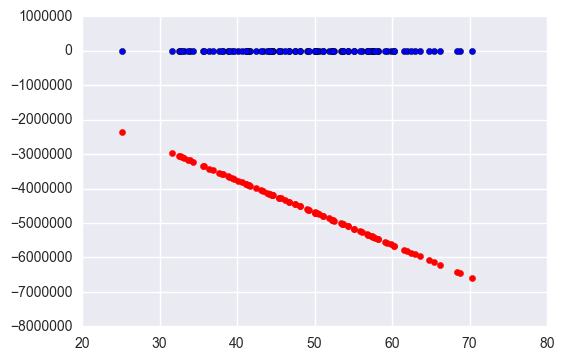

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 9 iterations b = 7347.45657772, m = 373826.765169, error = 3.48369227102e+14


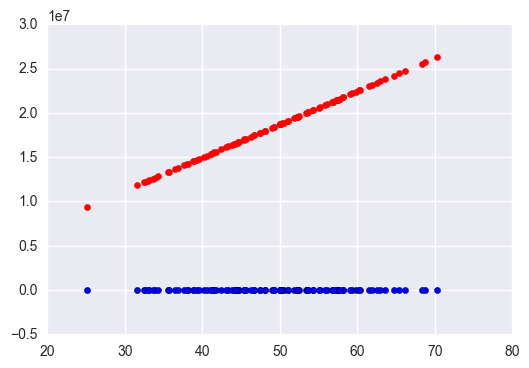

In [51]:
# Use this to visually discuss convergence rate based on learning rate

for num in range(0,10):
    run(num,0.001)
    plt.show()


The below cell shows the error slowly converging with a lower learning rate than 0.0001.

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 0 iterations b = 0, m = 0, error = 5565.10783448


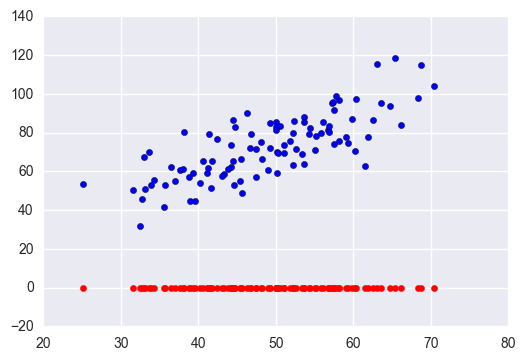

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 1 iterations b = 0.00727350505537, m = 0.36853514868, error = 3186.26691833


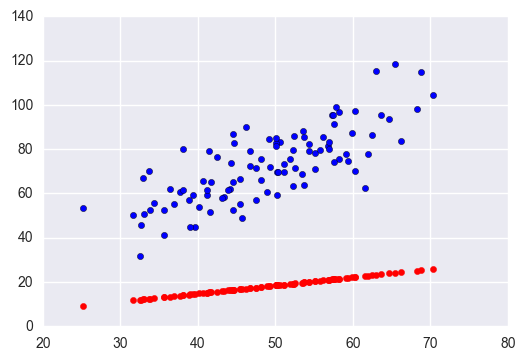

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 2 iterations b = 0.0127419957953, m = 0.645234012267, error = 1845.28541938


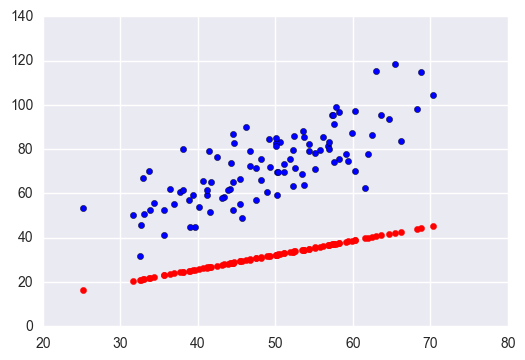

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 3 iterations b = 0.0168552679415, m = 0.852981490006, error = 1089.35786805


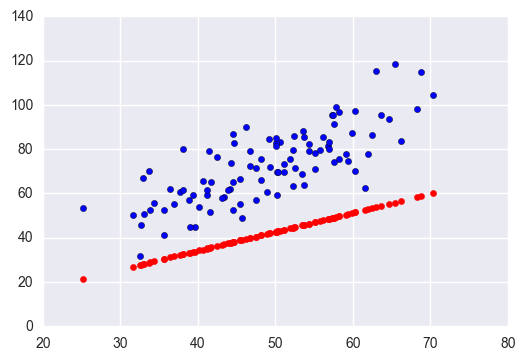

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 4 iterations b = 0.0199510315653, m = 1.00895973943, error = 663.2323265


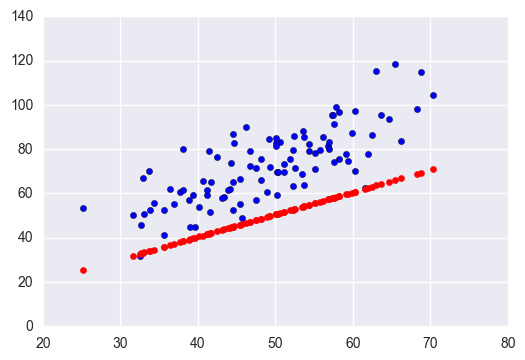

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 5 iterations b = 0.0222828419731, m = 1.12606925594, error = 423.020179918


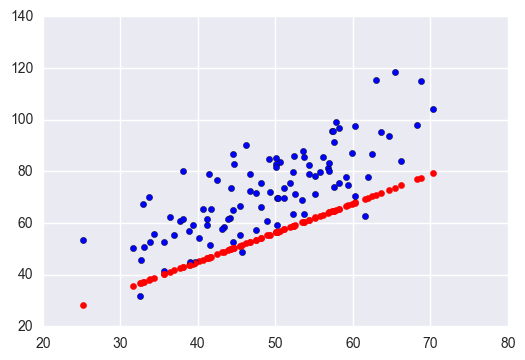

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 6 iterations b = 0.0240410704301, m = 1.21399583024, error = 287.609670094


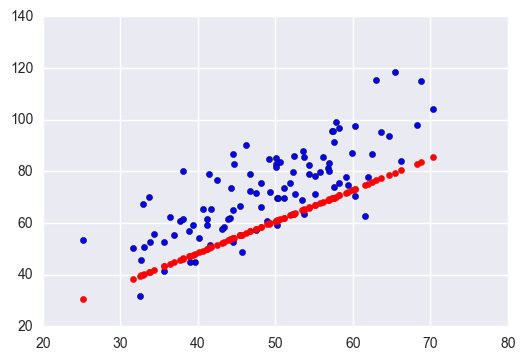

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 7 iterations b = 0.0253686491395, m = 1.28001162815, error = 211.277114652


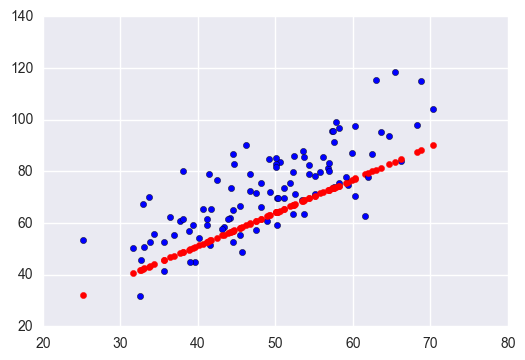

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 8 iterations b = 0.0263728926934, m = 1.3295766474, error = 168.247518993


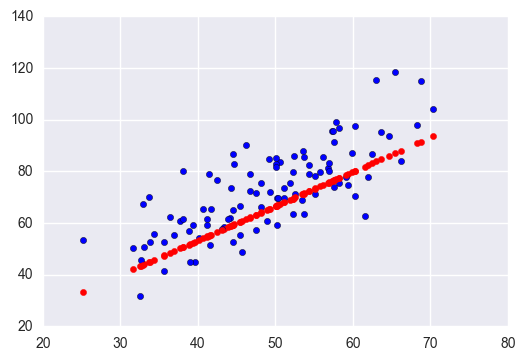

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 9 iterations b = 0.0271343737092, m = 1.36679029611, error = 143.991205886


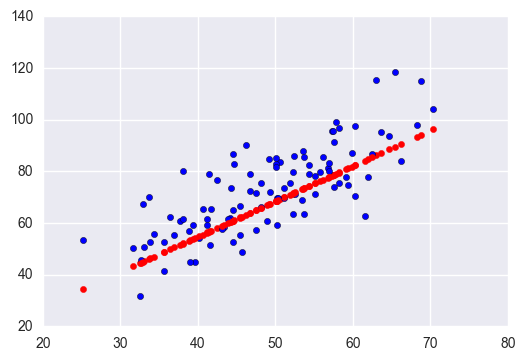

In [59]:
for num in range(0,10):
    run(num,0.00005)
    plt.show()

## Problem 3 Part 2

Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.

In [65]:
def err_convergence(num_iterations,l):
    points = genfromtxt("../data/data.csv", delimiter=",")
    learning_rate = l
    b = 0 # initial y-intercept guess
    m = 0 # initial slope guess
    err = []
    for i in range(num_iterations):
        err.append(compute_error_for_line_given_points(b, m, points))
        [b, m] = gradient_descent_runner(points, b, m, learning_rate, i)
    return err
                   
                   

    
                   

    

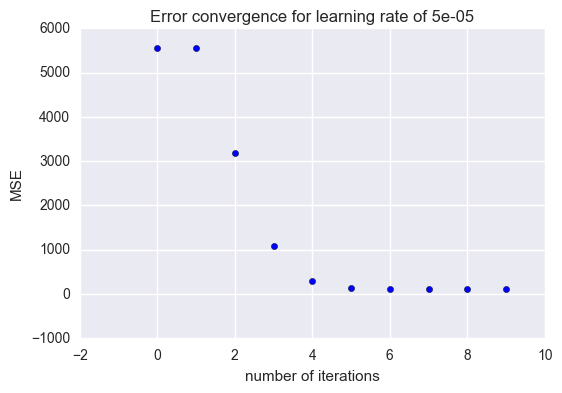

In [68]:
l = 0.00005
plt.scatter(range(10),err_convergence(10,l))
plt.xlabel("number of iterations")
plt.ylabel("MSE")
plt.title("Error convergence for learning rate of "+str(l))
plt.show()